In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import sklearn
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from sklearn.datasets import load_boston

In [ ]:
raw_df_keys = pd.read_csv('/content/sample_data/boston.csv')
raw_df_keys

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
raw_df_keys.keys()

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [ ]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [ ]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
X = data
Y = target

In [ ]:
# make our training and test data by splitting the set X
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state=123)

In [ ]:
print("shape:", X.shape)
print("shape train set:", X_train.shape)
print("shape test set:", X_test.shape)

shape: (506, 13)
shape train set: (404, 13)
shape test set: (102, 13)


In [ ]:
df = pd.DataFrame(X_train, columns = raw_df_keys.keys()[0:13])
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
1,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
2,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
3,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
4,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.08187,0.0,2.89,0.0,0.4450,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
400,4.87141,0.0,18.10,0.0,0.6140,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
401,0.35114,0.0,7.38,0.0,0.4930,6.041,49.9,4.7211,5.0,287.0,19.6,396.90,7.70
402,9.18702,0.0,18.10,0.0,0.7000,5.536,100.0,1.5804,24.0,666.0,20.2,396.90,23.60


Gradient Descent

In [ ]:
# cost function
def cost(X, Y, theta_array):
  M = len(Y) # number of examples
  # compute the cost
  #c = (1/(2*M)) * np.sum(np.square((X.dot(theta_array)) - Y))
  c = (1/2*M) * np.sum(np.square((X.dot(theta_array)) - Y))
  return c



# predicts the output for a given vestor of coefficients
def predict(X, theta_array):
    return X @ theta_array

# computer the coeffiv=cient of determination (r squared)
def score(X, Y, theta_array):
  Y_predicted = predict(X, theta_array);
  u = ((Y - Y_predicted)**2).sum()
  v = ((Y - Y.mean())**2).sum()
  return 1 - (u/v)

In [ ]:
# Implement Gradient Descent
def GD(X, Y_train, learning_rate, num_iterations):

  M, N = X.shape

  # concatenating ones (for theta 0) to our input set
  X_train = X.copy()
  array_of_ones = np.ones((len(Y_train), 1))
  X_train = np.hstack([X_train, array_of_ones])

  # create a random vector of coefficients
  np.random.seed(123)
  coefficients_array = np.random.uniform(-10.0, 10.0, N + 1)
  cost_array = []


  for x in range(num_iterations):
    current_cost = cost(X_train, Y_train, coefficients_array)
    cost_array.append(current_cost)

    print("Iteration :", x+1, "\t", "Cost : ", current_cost )
    slope_array = np.zeros(N + 1)


    for i in range(M):
      f_of_xi = (coefficients_array * X_train[i]).sum()
      y_of_i = Y_train[i]

      for j in range(N+1):
        slope_array[j] += (-2/M) * (y_of_i - f_of_xi) * X_train[i, j]


    coefficients_array -= (learning_rate * slope_array)
  

  return coefficients_array, cost_array


In [ ]:
coef_array, cost_array = GD(X_train, Y_train, 0.000001, 10)

Iteration : 1 	 Cost :  151318962470.21207
Iteration : 2 	 Cost :  54473884627.40568
Iteration : 3 	 Cost :  38397513675.246185
Iteration : 4 	 Cost :  33790411728.676487
Iteration : 5 	 Cost :  30995051253.8432
Iteration : 6 	 Cost :  28648647134.75623
Iteration : 7 	 Cost :  26543570448.21448
Iteration : 8 	 Cost :  24634478437.84679
Iteration : 9 	 Cost :  22900110208.538845
Iteration : 10 	 Cost :  21323930806.14371


Week 2 - Day 1

In [ ]:
import matplotlib.pyplot as plt

Iteration : 1 	 Cost :  151318962470.21207
Iteration : 2 	 Cost :  54473884627.40568
Iteration : 3 	 Cost :  38397513675.246185
Iteration : 4 	 Cost :  33790411728.676487
Iteration : 5 	 Cost :  30995051253.8432
Iteration : 6 	 Cost :  28648647134.75623
Iteration : 7 	 Cost :  26543570448.21448
Iteration : 8 	 Cost :  24634478437.84679
Iteration : 9 	 Cost :  22900110208.538845
Iteration : 10 	 Cost :  21323930806.14371
Iteration : 11 	 Cost :  19891313055.389282
Iteration : 12 	 Cost :  18589030522.963665
Iteration : 13 	 Cost :  17405082433.59573
Iteration : 14 	 Cost :  16328574374.333088
Iteration : 15 	 Cost :  15349615501.337856
Iteration : 16 	 Cost :  14459225981.325731
Iteration : 17 	 Cost :  13649253064.820553
Iteration : 18 	 Cost :  12912294904.392822
Iteration : 19 	 Cost :  12241631391.759872
Iteration : 20 	 Cost :  11631161365.493536
Iteration : 21 	 Cost :  11075345602.317175
Iteration : 22 	 Cost :  10569155059.254166
Iteration : 23 	 Cost :  10108023882.987967
Itera

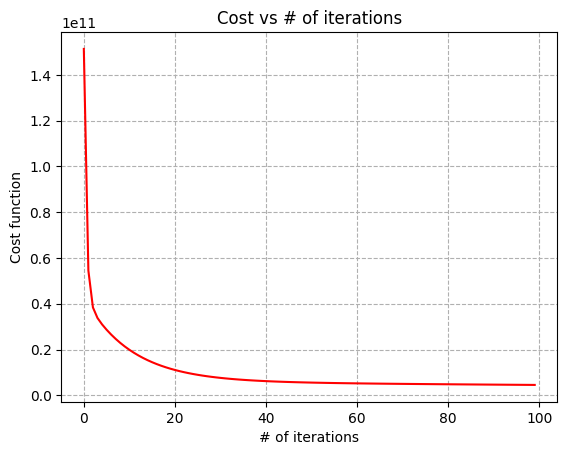

In [ ]:
coef_array, cost_array = GD(X_train, Y_train, 0.000001, 100)

plt.plot(np.arange(len(cost_array)), cost_array, color = 'red')
plt.xlabel("# of iterations")
plt.ylabel('Cost function')
plt.title("Cost vs # of iterations")
plt.grid(ls="--")
plt.show()

In [ ]:
X_train

array([[3.51000e-02, 9.50000e+01, 2.68000e+00, ..., 1.47000e+01,
        3.92780e+02, 3.81000e+00],
       [9.72418e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.85960e+02, 1.95200e+01],
       [1.39140e-01, 0.00000e+00, 4.05000e+00, ..., 1.66000e+01,
        3.96900e+02, 1.46900e+01],
       ...,
       [3.51140e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 7.70000e+00],
       [9.18702e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.36000e+01],
       [4.55587e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.54700e+02, 7.12000e+00]])

Standardizing and Scaling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()

X_train_standardized = std_scaler.fit_transform(X_train)

In [ ]:
X_train_standardized

array([[-0.40114949,  3.65385894, -1.2260954 , ..., -1.75369612,
         0.38848167, -1.26639758],
       [ 0.70272258, -0.48653392,  0.99548171, ...,  0.80891915,
         0.31399821,  0.94040677],
       [-0.38929627, -0.48653392, -1.02871793, ..., -0.86842903,
         0.43347755,  0.26193032],
       ...,
       [-0.36514321, -0.48653392, -0.548961  , ...,  0.52936112,
         0.43347755, -0.71996416],
       [ 0.64152421, -0.48653392,  0.99548171, ...,  0.80891915,
         0.43347755,  1.51352973],
       [ 0.11389959, -0.48653392,  0.99548171, ...,  0.80891915,
        -0.02740253, -0.80143753]])

In [ ]:
coef_array_std, cost_arry_std = GD(X_train_standardized, Y_train, 0.000001, 10)

Iteration : 1 	 Cost :  97107592.91250762
Iteration : 2 	 Cost :  97107109.76350026
Iteration : 3 	 Cost :  97106626.61920547
Iteration : 4 	 Cost :  97106143.47962318
Iteration : 5 	 Cost :  97105660.3447533
Iteration : 6 	 Cost :  97105177.21459572
Iteration : 7 	 Cost :  97104694.08915038
Iteration : 8 	 Cost :  97104210.9684172
Iteration : 9 	 Cost :  97103727.85239606
Iteration : 10 	 Cost :  97103244.74108689


Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:

minmax_scaler = MinMaxScaler()
X_train_normalized = minmax_scaler.fit_transform(X_train)

In [ ]:
X_train_normalized

array([[3.23480261e-04, 9.50000000e-01, 8.13782991e-02, ...,
        2.23404255e-01, 9.89611176e-01, 5.90070922e-02],
       [1.09226403e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 9.72414141e-01, 5.04680851e-01],
       [1.49286478e-03, 0.00000000e+00, 1.31598240e-01, ...,
        4.25531915e-01, 1.00000000e+00, 3.67659574e-01],
       ...,
       [3.87569366e-03, 0.00000000e+00, 2.53665689e-01, ...,
        7.44680851e-01, 1.00000000e+00, 1.69361702e-01],
       [1.03188854e-01, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 1.00000000e+00, 6.20425532e-01],
       [5.11358451e-02, 0.00000000e+00, 6.46627566e-01, ...,
        8.08510638e-01, 8.93590196e-01, 1.52907801e-01]])

In [ ]:
coef_array_norm, cost_array_norm = GD(X_train_normalized, Y_train, 0.000001, 10)

Iteration : 1 	 Cost :  57873510.435852006
Iteration : 2 	 Cost :  57872809.74386239
Iteration : 3 	 Cost :  57872109.06233418
Iteration : 4 	 Cost :  57871408.39126718
Iteration : 5 	 Cost :  57870707.73066127
Iteration : 6 	 Cost :  57870007.08051627
Iteration : 7 	 Cost :  57869306.44083205
Iteration : 8 	 Cost :  57868605.81160841
Iteration : 9 	 Cost :  57867905.19284523
Iteration : 10 	 Cost :  57867204.58454232


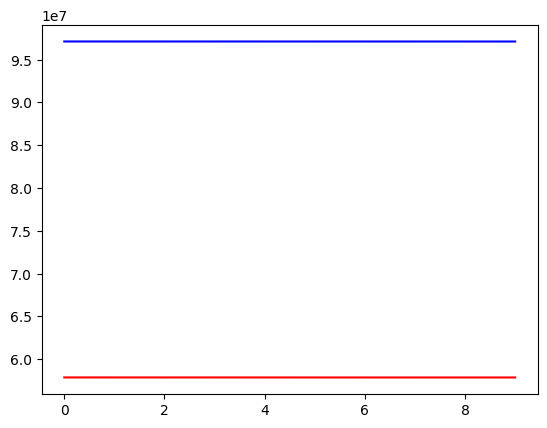

In [ ]:
# plot std vs nrml
plt.plot(np.arange(len(cost_array_norm)), cost_array_norm, color='red')
plt.plot(np.arange(len(cost_arry_std)), cost_arry_std, color='blue')

plt.show()

Classification

MNIST Hand Char Recognition

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [ ]:
X = mnist.data
y = mnist.target

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X.shape

(70000, 784)

In [ ]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [ ]:
y.shape

(70000,)

In [ ]:
28*28

784

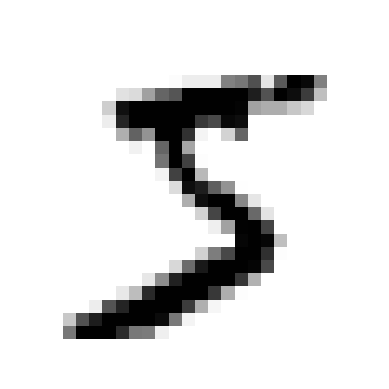

In [ ]:

def plot_digit(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis("off")



some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [ ]:
y[0]

'5'

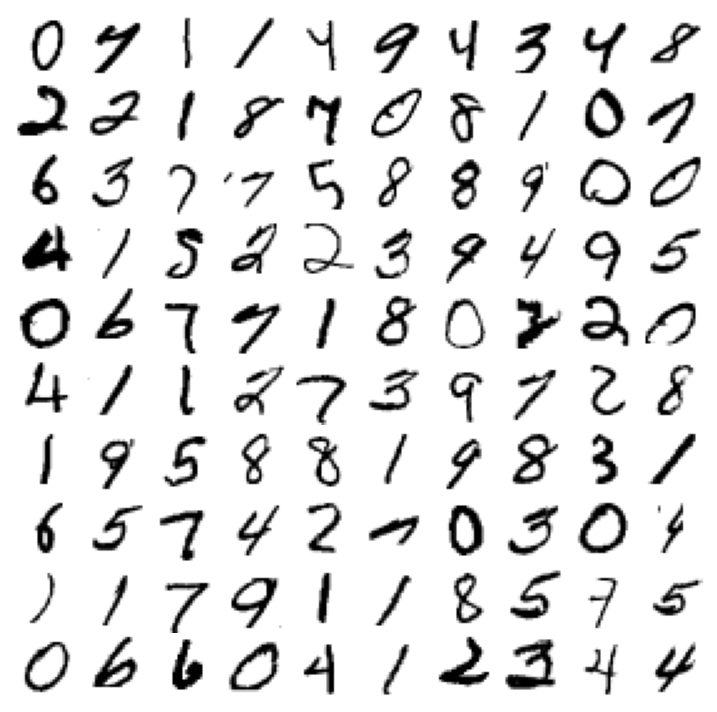

In [ ]:
plt.figure(figsize=(9,9))
for index, image_data in enumerate(X[1000:1100]):
  plt.subplot(10, 10, index+1)
  plot_digit(image_data)

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Binary Classifier

In [ ]:
# let's make sets for testing and training
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train_5)

SGDClassifier()

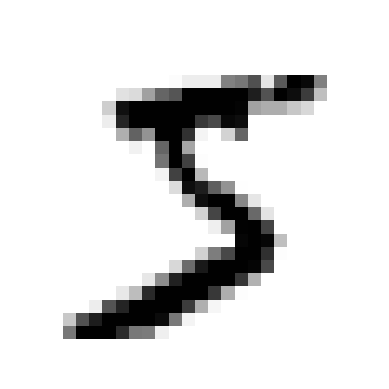

In [ ]:
plot_digit(some_digit)

In [ ]:
y_train[0]

'5'

In [ ]:
sgd_classifier.predict([some_digit])

array([ True])

In [ ]:
y_train[1]

'0'

In [ ]:
sgd_classifier.predict([X[1]])

array([False])

5


array([ True])

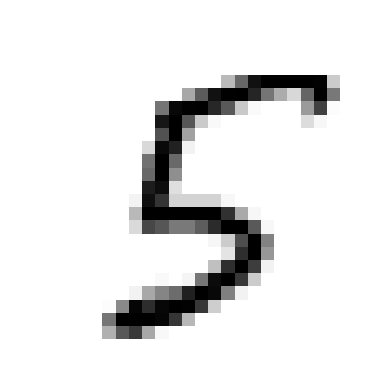

In [ ]:
# test predictions
plot_digit(X_test[23])
print(y_test[23])
sgd_classifier.predict([X_test[23]])

Evaluate our classifier

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9647 , 0.96015, 0.9632 ])

In [ ]:
# evaluate the algorithm with a dummy classifier
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_classifier = DummyClassifier()
dummy_classifier.fit(X_train, y_train_5)


DummyClassifier()

In [ ]:
cross_val_score(dummy_classifier, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [ ]:

y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [ ]:
cm

array([[53845,   734],
       [ 1608,  3813]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

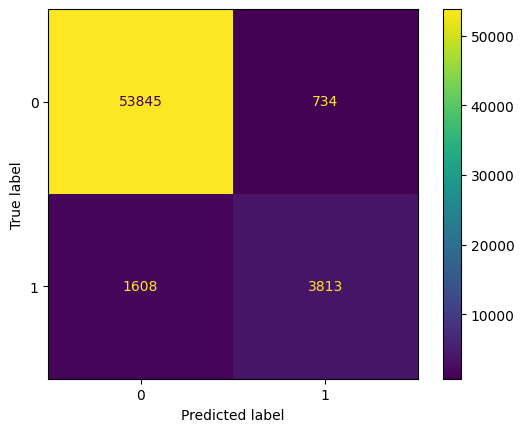

In [ ]:
ConfusionMatrixDisplay(cm).plot()

Precision and Recall

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_5, y_train_pred)

0.8385748845392567

In [ ]:
cm

array([[53845,   734],
       [ 1608,  3813]])

In [ ]:
cm[1,1] / (cm[1, 1] + cm[0,1])

0.8385748845392567

In [ ]:
recall_score(y_train_5, y_train_pred)

0.7033757609297178

In [ ]:
cm[1, 1] / (cm[1,1] + cm[1,0])

0.7033757609297178